In [78]:
import pandas as pd

In [79]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11175.754549,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10776.777318,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10329.931067,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11814.475945,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11473.100973,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [81]:
cat_data = df.select_dtypes(include='O')
cat_data.head()

,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac


In [82]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [83]:
df2=df.drop(['Company', 'TypeName','Cpu_brand','Gpu_brand', 'Os'],axis=1)
df2.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11175.754549,0,1,226.983005,0,128
1,8,1.34,10776.777318,0,0,127.677940,0,0
2,8,1.86,10329.931067,0,0,141.211998,0,256
3,16,1.83,11814.475945,0,1,220.534624,0,512
4,8,1.37,11473.100973,0,1,226.983005,0,256


In [84]:
df2.corr()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


In [85]:
import seaborn as sns

<AxesSubplot:>

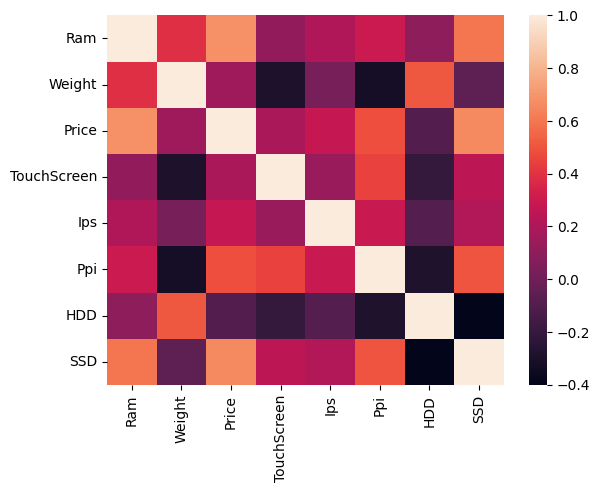

In [86]:
sns.heatmap(df2.corr())

In [87]:
corelation=df2.corr()

In [88]:
corelation['Price']

Ram            0.680519
Weight         0.151386
Price          1.000000
TouchScreen    0.194289
Ips            0.279240
Ppi            0.480687
HDD           -0.097361
SSD            0.658808
Name: Price, dtype: float64

In [89]:
column_list=list(corelation[corelation['Price']>0.10].index)
column_list

['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'SSD']

In [90]:
df3=df2[column_list]
df3.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,SSD
0,8,1.37,11175.754549,0,1,226.983005,128
1,8,1.34,10776.777318,0,0,127.677940,0
2,8,1.86,10329.931067,0,0,141.211998,256
3,16,1.83,11814.475945,0,1,220.534624,512
4,8,1.37,11473.100973,0,1,226.983005,256


In [91]:
x=df3.drop('Price',axis=1)
x

,Ram,Weight,TouchScreen,Ips,Ppi,SSD
0,8,1.37,0,1,226.983005,128
1,8,1.34,0,0,127.677940,0
2,8,1.86,0,0,141.211998,256
3,16,1.83,0,1,220.534624,512
4,8,1.37,0,1,226.983005,256
...,...,...,...,...,...,...
1268,4,2.20,0,0,100.454670,0
1269,4,1.80,1,1,157.350512,128
1270,16,1.30,1,1,276.053530,512
1271,2,1.50,0,0,111.935204,0


In [92]:
y=df3[['Price']]
y

,Price
0,11175.754549
1,10776.777318
2,10329.931067
3,11814.475945
4,11473.100973
...,...
1268,10555.256584
1269,10433.899310
1270,11288.114524
1271,9409.283030


In [93]:
y=df3[['Price']]
y['Price'][0]

11175.754549129524

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dtr = DecisionTreeRegressor()

In [98]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [99]:
dtr.score(x_train,y_train)

0.9583593361854483

In [100]:
dtr.score(x_test,y_test)

0.7138550735918767

In [101]:
pred=dtr.predict(x_test)

In [102]:
compare = y_test

In [103]:
compare['prediction'] = pred

In [104]:
compare['prediction'] = compare['prediction'].apply(lambda x :'{:.2f}'.format(x))

In [126]:
y.mean()

Price    10828.218231
dtype: float64

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rdf=RandomForestRegressor()

In [107]:
rdf.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [108]:
rdf.score(x_train,y_train)

0.9371805297422396

In [128]:
rdf.score(x_test,y_test)

0.7776311345050592